### Projet "Range ta chambre" ---> Franck Garcia Gonzalez & Timothée Da Costa Cantante
Consignes : Le but de ce dernier projet est de classifier  les images de vêtements du dataset fashion_MNIST (disponible sur keras par la commande keras.datasets.mnist.load_data() ), à l'aide de différents modèles de réseaux de neurones.

In [1]:
# Importation des librairies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-04-03 15:01:58.960980: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 15:01:58.961216: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 15:01:58.963321: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 15:01:58.990079: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 15:01:59.450343: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

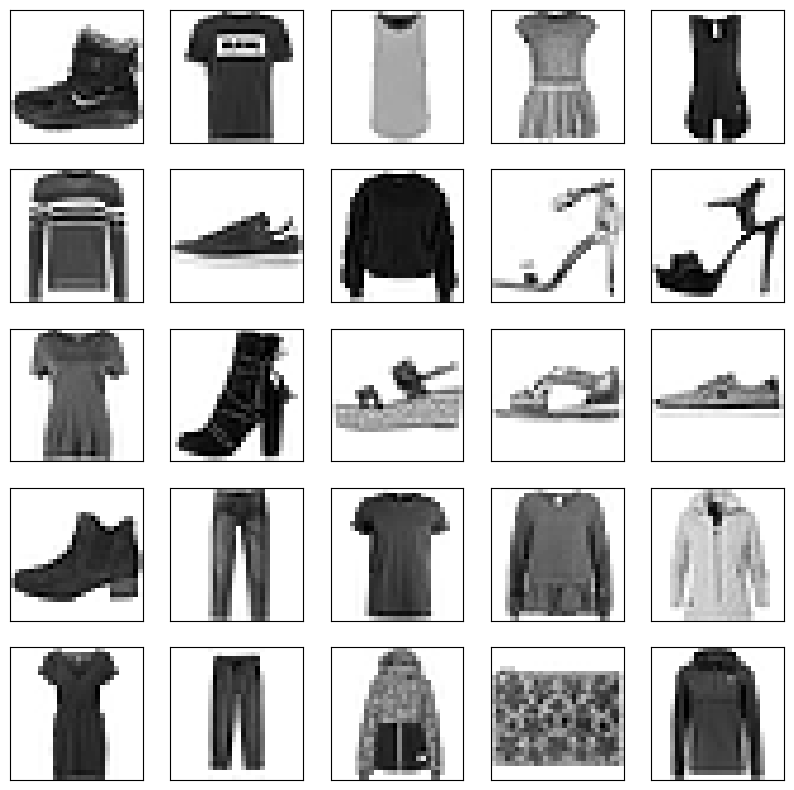

In [2]:
# Importation du dataset
fashion_mnist = keras.datasets.fashion_mnist

# On divise le dataset en un jeu d'entrainement et un jeu de test
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# On affiche les images du dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
plt.show()


In [3]:
# Normalisation des données
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

In [4]:
# Création du jeu de validation
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Affichage des dimensions des jeux de données
print("X_train shape : ", X_train.shape)
print("X_valid shape : ", X_valid.shape)
print("X_test shape : ", X_test_n.shape)
print("y_train shape : ", y_train.shape)
print("y_valid shape : ", y_valid.shape)
print("y_test shape : ", y_test.shape)


X_train shape :  (55000, 28, 28)
X_valid shape :  (5000, 28, 28)
X_test shape :  (10000, 28, 28)
y_train shape :  (55000,)
y_valid shape :  (5000,)
y_test shape :  (10000,)


In [5]:
# Création du modèle
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
    
# Compilation du modèle
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Affichage du résumé du modèle
model.summary()

# Entrainement du modèle
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

/home/fgarciag/PycharmProjects/AI-python/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6747 - loss: 0.9999 - val_accuracy: 0.8286 - val_loss: 0.5088
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8244 - loss: 0.4997 - val_accuracy: 0.8520 - val_loss: 0.4400
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8410 - loss: 0.4485 - val_accuracy: 0.8508 - val_loss: 0.4247
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8560 - loss: 0.4068 - val_accuracy: 0.8590 - val_loss: 0.4161
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.8573 - loss: 0.4024 - val_accuracy: 0.8594 - val_loss: 0.4063
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8676 - loss: 0.3774 - val_accuracy: 0.8734 - val_loss: 0.3681
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8697 - loss: 0.3727 - val_accuracy: 0.8694 - val_loss: 0.3739
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8762 - loss: 0.3490 

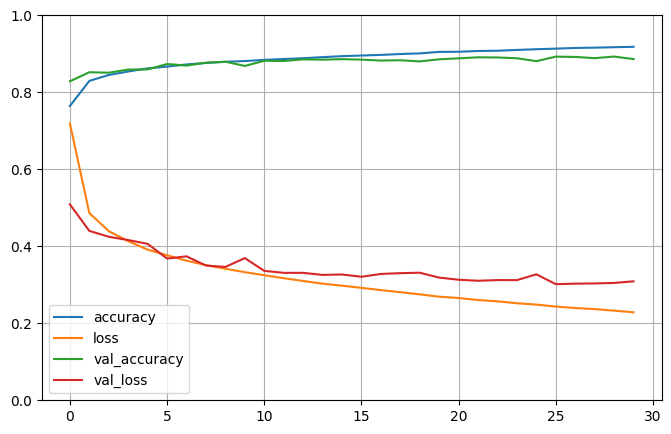

In [6]:
# Affichage des courbes d'apprentissage
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Ici, on peut voir que le modèle commence à overfitter après 10 epochs. On va donc essayer de régler ce problème en utilisant un callback.

In [ ]:
#Callback
